# Linear Regressor
Neste notebook usamos regressão linear para tentar prever a coluna 'price' (preço) do dataset de veículos do craiglist.

In [8]:
from Utils import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns; sns.set()

from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 4)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 8
rcParams['font.family'] = 'sans-serif'
rcParams['lines.linewidth'] = 2.0

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = load_vehicles_dataset_and_set_types_2('../datasets/train_vehicles.csv')
train_df = set_categories_as_codes(train_df)

## Verificando as condições de linearidade
Primeiro vamos verificar se o nosso dataset satisfaz as condições de linearidade para utilizarmos o regressor linear.

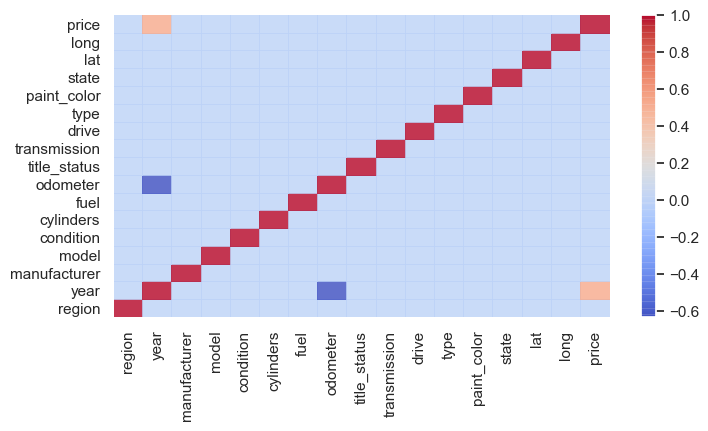

In [3]:
visualize_correlation_matrix(train_df, hurdle=0.5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

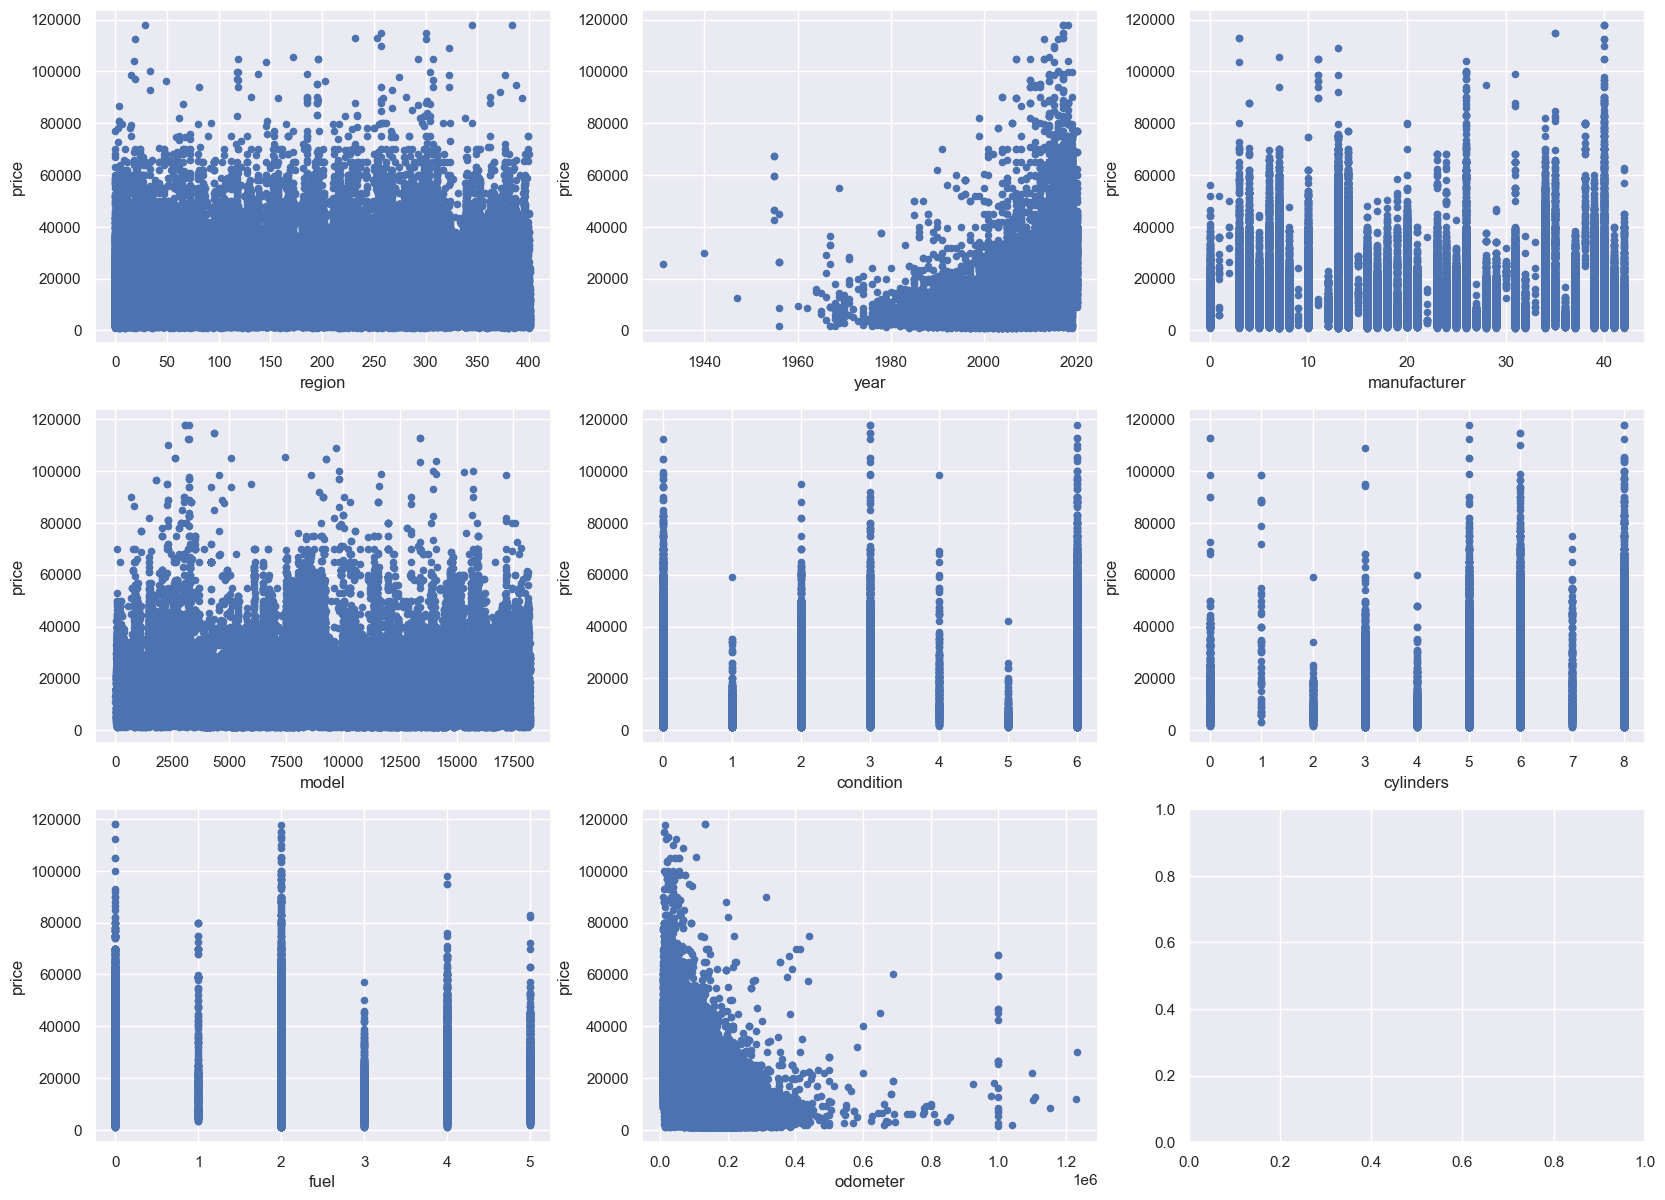

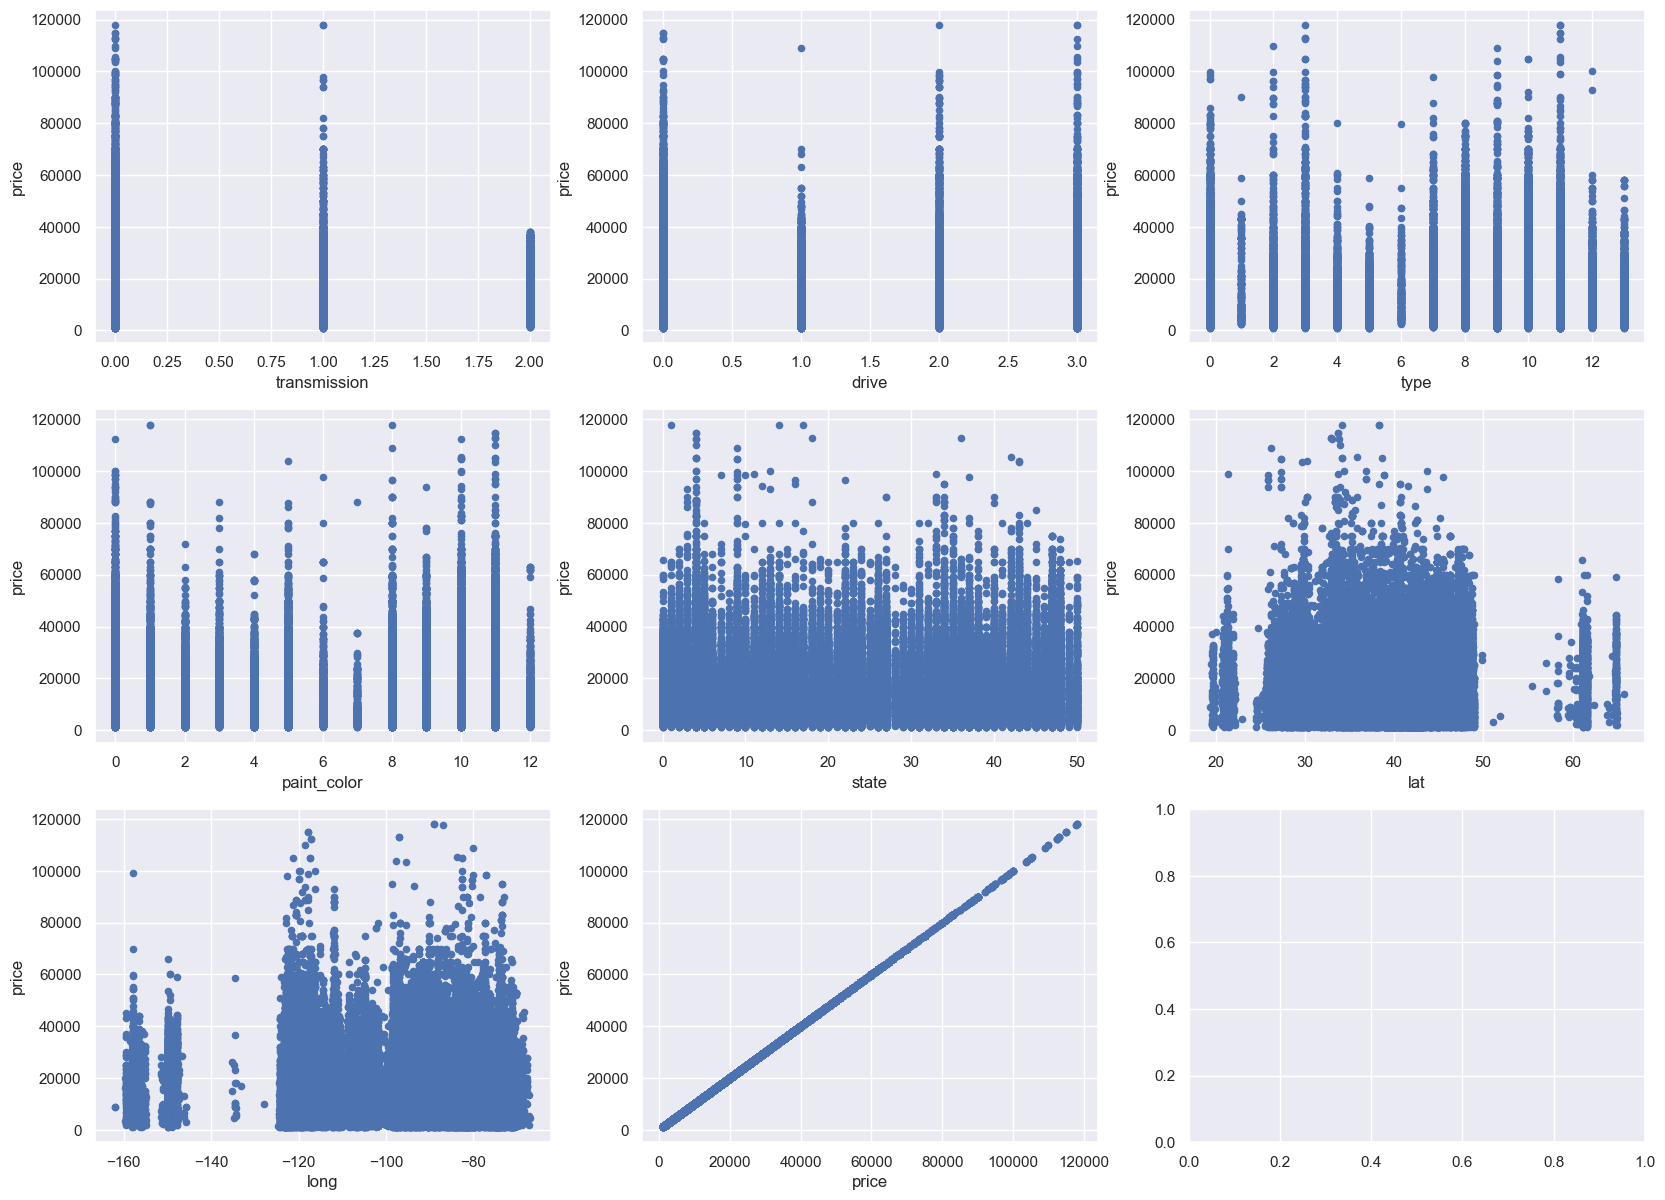

In [4]:
visualize_linear_correlation(train_df, train_df.columns[0:8], 'price')
visualize_linear_correlation(train_df, train_df.columns[9:], 'price')

De acordo com heatmap e com o scatter plot podemos notar que quase não existe um relação linear entre as variáveis e a coluna 'price'. Logo o regressor linear provavelmente não será o melhor algoritmo, porém vamos utilizar para comparar com o Random Forest Regressor.

## Treinamento do modelo

In [9]:
model = LinearRegression()
x_df = train_df.drop(columns=['price'])
model.fit(x_df, train_df['price'])

LinearRegression()

## Prevendo dataset de treino

In [18]:
predict = model.predict(train_df.drop(columns=['price']))

calculate_r2_and_mse(train_df, 'price')

R2:      0.455
MSE:     57714158.481


## Prevendo o dataset de teste

In [16]:
test_df = load_vehicles_dataset_and_set_types_2('../datasets/test_vehicles.csv')
test_df = set_categories_as_codes(test_df)

predict = model.predict(test_df.drop(columns=['price']))

calculate_r2_and_mse(test_df, 'price')

R2:      0.451
MSE:     57904254.517


A regressão linear não foi eficaz na previsão da coluna price.